In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df=pd.read_csv('data-final.csv',sep='\t')  #drop everything except responses to survey
df=df.loc[:,'EXT1':'OPN10']
df.dropna(inplace=True)
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


In [3]:
X=df.to_numpy()
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

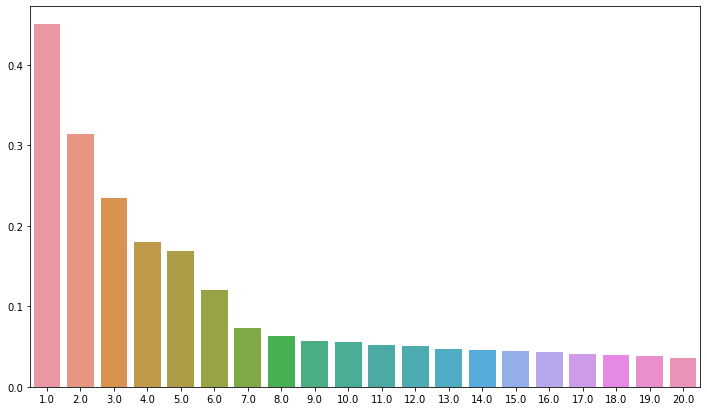

In [4]:
pca_model=PCA()
pca_model.fit(X)
plt.figure(figsize=(12,7))
sns.barplot(x=np.linspace(1,20,20),y=pca_model.explained_variance_[0:20])


PCA seems to imply the intrinsic dimentionality of dataset is about 7 or 8 via "Elbow method".  
Let's see if we get a similar result when trying KMeans clustering...


Testing model # 1  of 15...
Testing model # 2  of 15...
Testing model # 3  of 15...
Testing model # 4  of 15...
Testing model # 5  of 15...
Testing model # 6  of 15...
Testing model # 7  of 15...
Testing model # 8  of 15...
Testing model # 9  of 15...
Testing model # 10  of 15...
Testing model # 11  of 15...
Testing model # 12  of 15...
Testing model # 13  of 15...
Testing model # 14  of 15...
Testing model # 15  of 15...


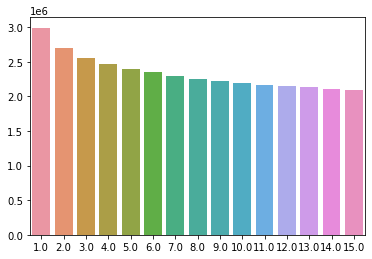

In [5]:
inertias=[]  #this cell takes a very long time to run. Make sure your CPU fan isn't blocked.
for n_clusters in range(1,16):
    print('Testing model #',n_clusters,' of 15...')
    km_model=KMeans(n_clusters=n_clusters)
    km_model.fit(X)
    inertias.append(km_model.inertia_)
sns.barplot(x=np.linspace(1,15,15),y=inertias)

KMeans didn't seem to grab the clusters.  Let's try DBScan...

In [ ]:
from sklearn.cluster import DBSCAN  # this cell will run until your CPU can fry an egg.  No idea if it even works.
db_model=DBSCAN()
db_model.fit(X)
colors=db_model.labels_
ax.scatter(x, y, z,c=colors,cmap='tab10')

plt.show()